In [11]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from config import cache_path, save_path
from pathlib import Path
import numpy as np

In [178]:
boc = BrainObservatoryCache(manifest_file=str(
            Path(cache_path) / 'brain_observatory_manifest.json'))

eid=501559087
#eid=564425777
eid=567734055

data_dct={}

data_set = boc.get_ophys_experiment_data(eid)

data_dct['movie_stim_table'] = data_set.get_stimulus_table(
                'natural_movie_one')

data_dct['neural_responses'] = data_set.get_dff_traces()[1]

In [179]:
data_dct['neural_responses'].shape

(241, 114165)

In [180]:
data_dct['movie_stim_table']

,frame,start,end,repeat
0,0,70476,70476,0
1,1,70477,70477,0
2,2,70478,70478,0
3,3,70479,70479,0
4,4,70480,70480,0
...,...,...,...,...
8995,895,79521,79521,9
8996,896,79522,79522,9
8997,897,79523,79523,9
8998,898,79524,79524,9


In [141]:
data_dct['neural_responses'][:,38749:(38749+900)]
#X=dff[1][:,38749:(38749+900)]

array([[ 4.1375391e-02,  1.8582508e-02,  7.5950958e-02, ...,
         3.9312635e-02, -3.0153748e-02,  4.7325236e-03],
       [ 1.4622192e-01,  6.7504428e-02, -1.4544210e-02, ...,
         1.8862096e+00,  1.6689435e+00,  1.7145643e+00],
       [-2.6581520e-02, -9.7623924e-05, -6.5292567e-02, ...,
        -5.2210122e-02, -5.1503856e-02,  8.1780646e-03],
       ...,
       [-3.0112842e-02, -5.1095508e-02, -1.9610340e-02, ...,
        -3.0313572e-02,  5.7511050e-02, -8.6430162e-02],
       [-1.3270264e-02,  1.1683735e-02, -7.0314378e-02, ...,
         5.6903075e-02, -8.9695221e-03, -2.8303338e-02],
       [ 4.4263583e-02,  3.8264357e-02, -2.8717842e-02, ...,
        -4.9459547e-02, -3.5502523e-02, -2.5548382e-02]], dtype=float32)

In [67]:
# Download experiment containers for Cux2 experiments
#Pan-excitatory
import pprint
Emx1_exps = boc.get_experiment_containers(cre_lines=['Emx1-IRES-Cre'])
print("Emx1 experiments: %d\n" % len(Emx1_exps))

print("Example experiment container record:")
pprint.pprint(Emx1_exps[0])

# Find all of the experiments for an experiment container
Emx1_id = Emx1_exps[0]['id']
exps = boc.get_ophys_experiments(experiment_container_ids=[Emx1_id])
print("Experiments for experiment_container_id %d: %d\n" % (Emx1_id, len(exps)))
pprint.pprint(exps)
exp=exps[1]
print(exp)

Emx1 experiments: 41

Example experiment container record:
{'cre_line': 'Emx1-IRES-Cre',
 'donor_name': '283147',
 'failed': False,
 'id': 564425775,
 'imaging_depth': 175,
 'reporter_line': 'Ai93(TITL-GCaMP6f)',
 'specimen_name': 'Emx1-IRES-Cre;Camk2a-tTA;Ai93-283147',
 'tags': [],
 'targeted_structure': 'VISl'}
Experiments for experiment_container_id 564425775: 3

[{'acquisition_age_days': 121,
  'cre_line': 'Emx1-IRES-Cre',
  'donor_name': '283147',
  'experiment_container_id': 564425775,
  'fail_eye_tracking': True,
  'id': 567734055,
  'imaging_depth': 175,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'session_type': 'three_session_B',
  'specimen_name': 'Emx1-IRES-Cre;Camk2a-tTA;Ai93-283147',
  'targeted_structure': 'VISl'},
 {'acquisition_age_days': 106,
  'cre_line': 'Emx1-IRES-Cre',
  'donor_name': '283147',
  'experiment_container_id': 564425775,
  'fail_eye_tracking': True,
  'id': 564425777,
  'imaging_depth': 175,
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'session_type': 't

In [186]:
embeddings=np.load(Path(save_path)/Path('natural_movie_one_dino.npy'))
#embeddings=np.load(Path(save_path)/Path('movie_one.npy'))
print(embeddings.shape)
embeddings=np.load('/home/maria/CalciumImaging/movie_one_dino.npy')
embeddings=np.load(Path(save_path)/Path('natural_movie_one_clip.npy'))

(900, 768)


In [226]:
def make_regression_data(data_dct, embeddings):
        np.random.seed = 7879
        stimuli = data_dct['movie_stim_table'].loc[data_dct['movie_stim_table']['repeat'] == 9]
        print(stimuli)

        X_train, X_test, y_train_inds, y_test_inds = train_test_split(embeddings,stimuli['start'].values, test_size=0.7, random_state=42)
        y_train=data_dct['neural_responses'][:,y_train_inds]
        y_test=data_dct['neural_responses'][:,y_test_inds]

        return y_train, y_test, X_train, X_test

y_train_movie, y_test_movie, train_embedding,test_embedding = make_regression_data(data_dct, embeddings) 
print(y_train_movie.shape, y_test_movie.shape, train_embedding.shape, test_embedding.shape)

      frame  start    end  repeat
8100      0  78621  78621       9
8101      1  78622  78622       9
8102      2  78623  78623       9
8103      3  78624  78624       9
8104      4  78625  78625       9
...     ...    ...    ...     ...
8995    895  79521  79521       9
8996    896  79522  79522       9
8997    897  79523  79523       9
8998    898  79524  79524       9
8999    899  79525  79525       9

[900 rows x 4 columns]
(241, 270) (241, 630) (270, 768) (630, 768)


In [117]:
y_train_movie.shape

(720, 274)

In [227]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Assuming train_embedding and test_embedding are your feature matrices
# and y_train_movie, y_test_movie are your target variables

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training features
train_embedding_scaled = scaler.fit_transform(train_embedding)

# Transform the test features using the same scaler
test_embedding_scaled = scaler.transform(test_embedding)


# Create a Linear Regression model
regr = LinearRegression()
regr=Ridge(10)

# Fit the model with scaled training features and target variable
regr.fit(train_embedding_scaled, y_train_movie.T)

# Make predictions on scaled test features
predictions = regr.predict(test_embedding_scaled)

# Calculate R-squared score
r2 = r2_score(y_test_movie.T, predictions)

print("R-squared score:", r2)

R-squared score: -0.33492874964871344


In [228]:
scores=[]
for i in range(0,174):
    scores.append(r2_score(y_test_movie.T[:,i], predictions[:,i]))
    print(r2_score(y_test_movie.T[:,i], predictions[:,i]))

0.1560027419308323
-0.5685874022145467
-0.7481745255176693
0.7706768162098488
-0.8073302183391713
-0.7024639385702856
0.7948748467183793
-0.7946936205916331
0.5232130267538482
-0.999684481513726
-0.49068291019264176
-0.3171262470659477
-0.13044690493226518
0.01849756667357172
-0.8662751588600746
-0.740209185384157
0.6446038016487985
-0.6180424243934122
-0.8583985394379228
-0.3413865003421339
-0.44824593777267285
-0.7203666724238824
-0.5804582776598912
-0.7139678847384676
-0.8321213128058502
0.05154009128281711
-0.7052569370660673
0.01577972046615672
0.6392095034318553
-0.4996994475723413
-0.5197792341783725
0.09758634550306056
-0.13993925590691747
-0.7295029787737157
-0.6485851271696599
-1.1437843321484347
0.7367946617674026
-0.6287446119222768
0.2104404548263792
-0.6410137679834189
0.18247470098649876
-0.5168132824653713
0.32403448305761906
-0.20035276764706245
-0.48802997636110246
-0.5586946798289742
-0.913348853210044
0.1489917952292541
-0.2954645077586846
0.20935196925234179
-0.476

(array([ 6., 30., 43., 32., 11., 13., 16.,  5., 10.,  8.]),
 array([-1.14378433, -0.94470522, -0.7456261 , -0.54654699, -0.34746787,
        -0.14838876,  0.05069036,  0.24976947,  0.44884859,  0.6479277 ,
         0.84700682]),
 <BarContainer object of 10 artists>)

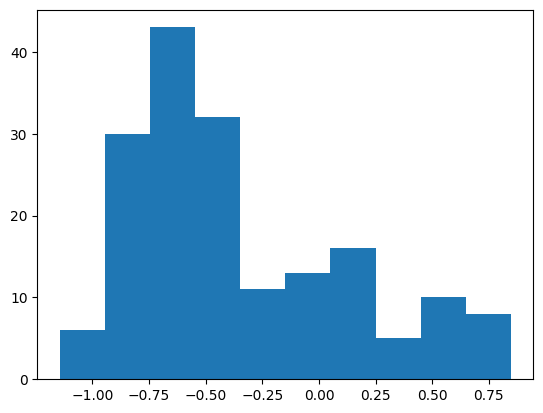

In [229]:
import matplotlib.pyplot as plt


plt.hist(scores)

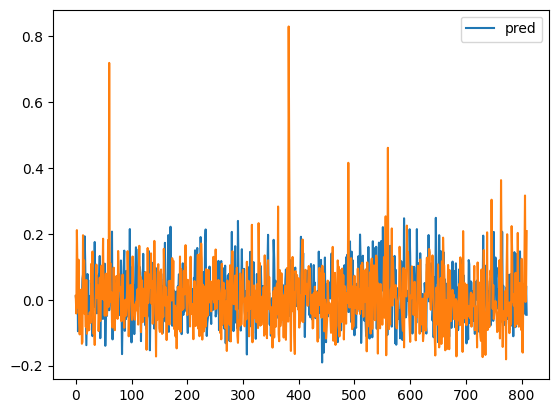

In [197]:
plt.plot(predictions[:,5],label='pred')
plt.plot(y_test_movie.T[:,5])
plt.legend()

In [137]:
predictions.shape

(180, 274)

In [64]:
regr.coef_.shape

(174, 768)

In [223]:
from sklearn.decomposition import PCA

pca=PCA(n_components=30)
trn=pca.fit_transform(train_embedding)
print(train_embedding.shape, test_embedding.shape)
tst=pca.transform(test_embedding)
#print(tst.shape)
print(tst.shape)

(270, 768) (630, 768)
(630, 30)


In [232]:
pca.components_.shape

(30, 768)

In [230]:
regr.coef_.shape

(241, 768)

<Axes: >

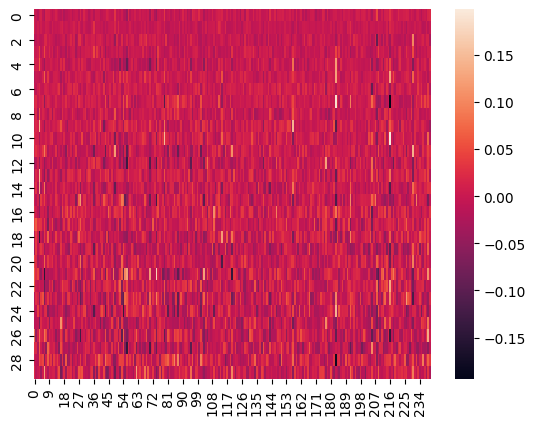

In [236]:
heatmap=pca.components_@regr.coef_.T
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

pw=cosine_similarity(pca.components_,regr.coef_)


sns.heatmap(pw)

<Axes: >

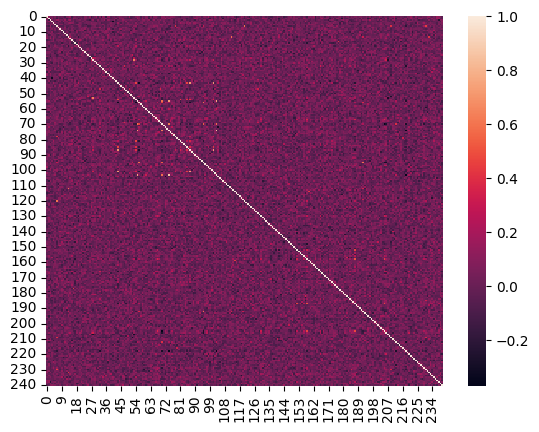

In [237]:
heatmap=pca.components_@regr.coef_.T
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

pw=cosine_similarity(regr.coef_)


sns.heatmap(pw)

In [224]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Assuming train_embedding and test_embedding are your feature matrices
# and y_train_movie, y_test_movie are your target variables

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training features
train_embedding_scaled = trn

# Transform the test features using the same scaler
test_embedding_scaled = tst


# Create a Linear Regression model
regr = LinearRegression()
regr=Ridge(10)

# Fit the model with scaled training features and target variable
regr.fit(train_embedding_scaled, y_train_movie.T)

# Make predictions on scaled test features
predictions = regr.predict(test_embedding_scaled)

# Calculate R-squared score
r2 = r2_score(y_test_movie.T, predictions)

print("R-squared score:", r2)

R-squared score: 0.026846440024469648


0.12568502261625647
-0.04518997757761367
-0.05660218666715555
0.649133162458905
-0.17742298230169062
-0.060741594053036696
0.5362372419204947
-0.09689795623815378
0.3924988053738897
-0.140655819020572
-0.05057252260537326
0.02322160349145408
-0.005792001185173312
0.19330339534054108
-0.10316049035332031
-0.01931986280909781
0.29782550139912456
-0.062115239033648795
-0.0557929305515823
-0.02934238649063503
-0.08425877208529609
-0.0784869080944941
-0.059646590506228
-0.07350729432522107
-0.07336322697034059
0.1386941721894075
-0.08847315609980133
0.1922401333410647
0.4197964946882604
-0.1210493318894863
-0.017660242661674985
0.12085339535850914
0.017471187625271223
-0.1385099239942429
-0.08402420559090173
-0.14249126304639992
0.4832776802733162
-0.0666520091091447
0.07949335457775442
-0.05344360324556874
-0.09772291135136735
-0.07396043491208815
0.3525922531148026
-0.38730734023188895
-0.08125068884856157
-0.12813181356632652
-0.1851404466296962
0.1390374087669488
0.00802312107516201
0.1

(array([ 3.,  6., 68., 50., 18., 12.,  6.,  6.,  2.,  3.]),
 array([-0.38730734, -0.27829131, -0.16927528, -0.06025925,  0.04875679,
         0.15777282,  0.26678885,  0.37580488,  0.48482091,  0.59383694,
         0.70285297]),
 <BarContainer object of 10 artists>)

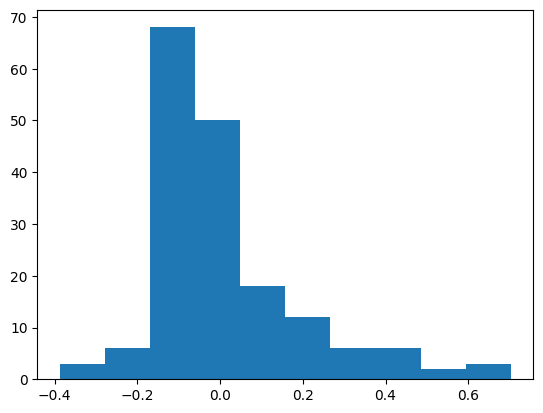

In [225]:
scores=[]
for i in range(0,174):
    scores.append(r2_score(y_test_movie.T[:,i], predictions[:,i]))
    print(r2_score(y_test_movie.T[:,i], predictions[:,i]))

import matplotlib.pyplot as plt


plt.hist(scores)